# K-Means Clustering applied to Sporulation Dataset

## Introduction

This Jupyter Notebook contains all the code used to replicate the results from the paper [Comparisons and validation of statistical clustering techniques for microarray gene expression data](../docs/papers/A1-Comparison-Bioinformatics-2003-Datta.pdf), in particular, the application of *K-Means clustering* to the *Sporulation Dataset*, which contains data from the output of DNA microarrays, which captured the expression levels of nearly every yeast gene during sporulation, first published in the paper [Transcriptional Program of Sportulation in Budding Yeast](../docs/papers/A2-The%20Transcriptional%20Program%20of%20Sporulation%20in%20Budding%20Yeast.pdf).

In [42]:
# Import libraries
import pandas as pd # DataFrame manipulation

import matplotlib.pyplot as plt # Data visualization
from matplotlib import rcParams # Params for in-line visualization
import scienceplots # Plotting style settings
plt.style.use(['science', 'notebook', 'std-colors', 'grid'])
rcParams['figure.figsize'] = [10, 5]  # Set up image visualization params

## Methodology

This sections illustrates the pre-processing steps, hyperparameter tuning, plot generation, etc. That has been developed in order to obtain our results with the K-Means algorithm applied to the Sporulation Dataset.

In [53]:
# Load the Dataset
data = pd.read_csv('../data/sporulation-filtered.txt', delimiter="\t", header=None)
data.columns = data.iloc[0] # Set the first row as columns
data = data[1:] # Ignore first row
# Take a look at the first rows
data.head()

,Genes,t0,"t0,5",t2,t5,t7,t9,"t11,5"
1,YAL025C,"1,163781","-1,758143","-0,31495","0,283874","-0,6779","0,470183","0,833156"
2,YAL036C,"0,955552","-1,48956","-0,499057","-0,099143","-0,674453","1,414381","0,39228"
3,YAL040C,"1,454598","-0,735149","-0,073602","-0,618896","-0,789697","1,391507","-0,62876"
4,YDL037c,"1,698578","-1,268638","-0,375511","0,996817","-0,319158","-0,344837","-0,387251"
5,YDR184C,"1,302831","-1,338633","-0,555163","-0,101402","-0,674167","1,317301","0,049233"


In [64]:
# Take a look at the last rows
data.tail()

# Ignore last 2 rows, since they contains the mean and standard deviation of the columns
# also, they are incorrectly loaded, leaving NaN values for t11,5
data = data.iloc[:-2, :]
data.tail()

,Genes,t0,"t0,5",t2,t5,t7,t9,"t11,5"
468,YOL039W,"1,725535","-0,041491","-0,915184","-0,938438","-0,702795","-0,026492","0,898865"
469,YOL040C,"1,763952","-0,675352","-0,418792","-0,843389","-0,818655","0,058386","0,93385"
470,YPL079W,"1,47357","-0,980588","0,187547","-0,775976","-1,067287","0,126038","1,036696"
471,YPL081W,"1,543327","-1,09","-0,374713","-0,780946","-0,671057","0,308319","1,065071"
472,YPL090C,"1,85523","-0,550056","-0,264951","-1,042622","-0,729874","-0,019525","0,751798"


#### Exploratory Data Analysis

1. **Check for Missing values**

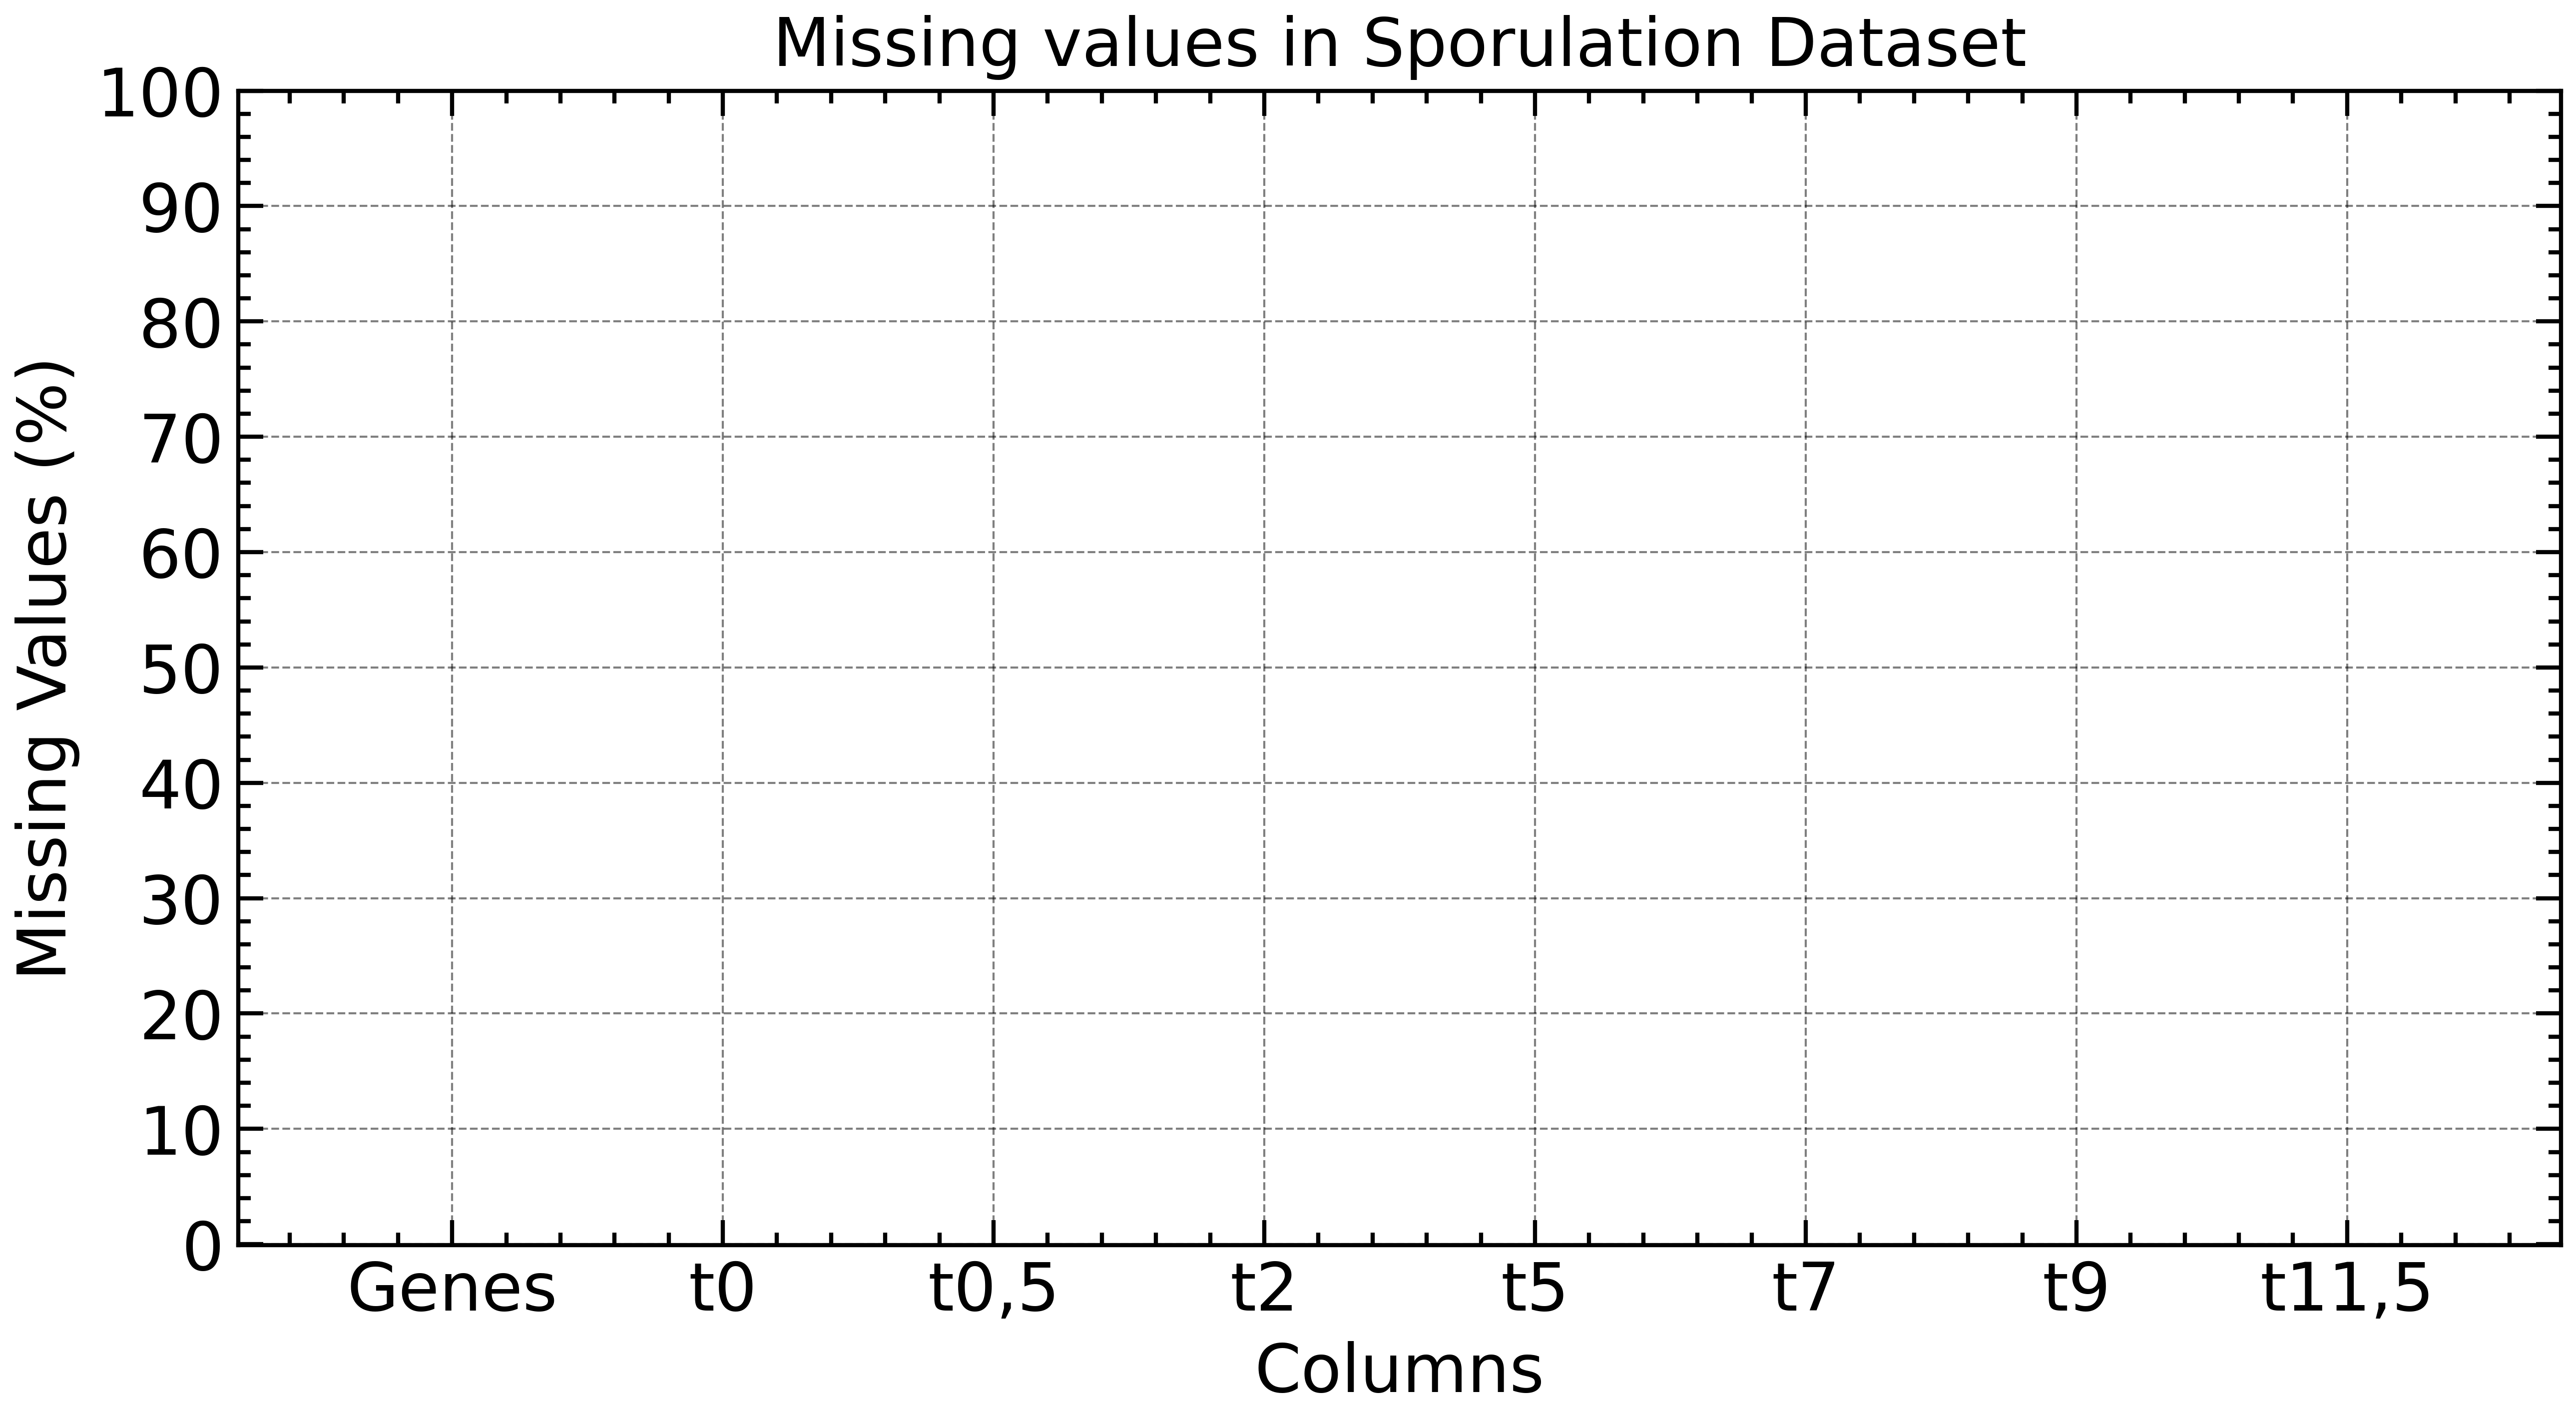

472

In [73]:
missing = data.isnull().sum() # Compute the sum of True values for each column
missing = missing / data.shape[0]
# Plot the results
plt.bar(x=missing.index, height=missing.values)
plt.title('Missing values in Sporulation Dataset')
plt.ylabel('Missing Values (%)')
plt.yticks(range(0, 110, 10))
plt.xlabel('Columns')
plt.show()